<a href="https://colab.research.google.com/github/varunishere/Q-learning/blob/main/sentient_analysis_embed_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing the modules required
import re
import pickle
import numpy as np
import pandas as pd

import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from nltk.stem import WordNetLemmatizer

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,roc_curve,auc

In [ ]:
#getting the dataset
df_columns  = ["sentiment", "id", "date", "query", "user_id", "text"]
df_encoding = "ISO-8859-1"
df = pd.read_csv('/content/drive/MyDrive/training.1600000.processed.noemoticon.csv',
                      encoding=df_encoding , names=df_columns)

df = df.drop(['id', 'date', 'query', 'user_id'], axis=1)
df['sentiment'] = df['sentiment'].replace(4,1)



text, sentiment = list(df['text']), list(df['sentiment'])

[0 1]


[Text(0, 0, '0'), Text(0, 0, '1')]

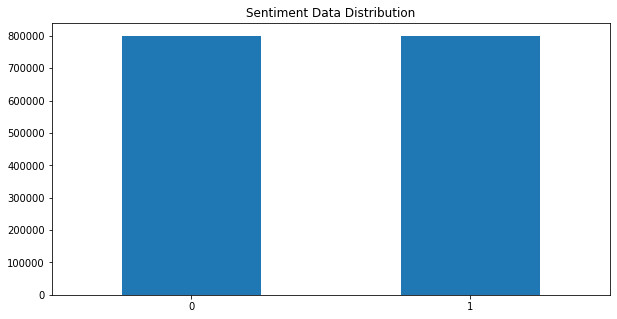

In [ ]:
#plot the bar chart
val_count = df.sentiment.value_counts()
ax = df['sentiment'].unique()
print(ax)
plt.figure(figsize=(10,5))
bar=val_count.plot(kind='bar', title='Sentiment Data Distribution',
                                               legend=False)
bar.set_xticklabels(ax, rotation=0)

In [ ]:
# Defining dictionary using emoticons gotten from wikipedia, emojis not used in the
#dataset and hence not taken under consideration
emoticons = {':)': 'smile', ':-)': 'smile', ':^)': 'smile', ':-d': 'smile', 
          ';d': 'wink',';)': 'wink', ';-)': 'wink', 
          ':(': 'sad', ':-(': 'sad', ':-<': 'sad',':"(':'sad',':"-(':'sad', 
          ':p': 'cheeky',':-p':'cheeky', ':o': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'skeptical', 
          ':#': 'tonguetied', ':X': 'tonguetied',  ':-&': 'confused', '$$':'money',
          '@@': 'eyeroll',   'O.o': 'confused','o.o': 'confused', '*_*' :'in love',
          '-_-': 'shame',  ":'-)": 'sadhappy',  '^.^=': 'catface', '^_^=': 'joy',
          '<3':'heart','</3':'brokenheart','<\3':'brokenheart',
          ':*':'kiss','xx':'kiss', ':3':'coysmile',':-3':'coysmile' ,
          'owo':'cute','uwu':'joy','( ͡° ͜ʖ ͡°)':'mischievous' 	}



In [ ]:
#preprocess the tweets
def preprocess(textdata):
    processedText = []
    
    wordLemm = WordNetLemmatizer()
    
    urlPattern        = r"((https?://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphanumPattern      = "[^a-zA-Z0-9']"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    for tweet in textdata:
        tweet = tweet.lower()
        
        tweet = re.sub(urlPattern,' URL',tweet)
        tweet = re.sub(userPattern,' USER', tweet)        
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)
        for emoticon in emoticons:
            tweet = tweet.replace(emoticon, "EMOTICON" + emoticons[emoticon])       
        tweet = re.sub(alphanumPattern, " ", tweet)

        tweetwords = ''
        for word in tweet.split():
            if len(word)>1:
                
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')
            
        processedText.append(tweetwords)
        
    return processedText

In [ ]:
import time
t = time.time()
count=0
processedtext = preprocess(text)
printf("done")


In [ ]:

count=0
for tex in text:
    if count<50:
        print(tex)
    count+=1
count=0
for tex in processedtext:
    if count<50:
        print(tex)
    count+=1


@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!
@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds
my whole body feels itchy and like its on fire 
@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. 
@Kwesidei not the whole crew 
Need a hug 
@LOLTrish hey  long time no see! Yes.. Rains a bit ,only a bit  LOL , I'm fine thanks , how's you ?
@Tatiana_K nope they didn't have it 
@twittera que me muera ? 
spring break in plain city... it's snowing 
I just re-pierced my ears 
@caregiving I couldn't bear to watch it.  And I thought the UA loss was embarrassing . . . . .
@octolinz16 It it counts, idk why I did either. you never talk to me anymore 
@smarrison i would've been the first, but i didn't have a gun.    not rea

In [ ]:
X_train_1, X_test_1, y_train, y_test = train_test_split(processedtext, sentiment,
                                                    test_size = 0.0025, random_state = 0)


In [ ]:
!python --version


Python 3.7.10


In [ ]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000,token_pattern=r"(?u)\b\w\w+\b|\'")
vectoriser.fit(X_train_1)
print("done")

done


In [ ]:
X_train = vectoriser.transform(X_train_1)
X_test  = vectoriser.transform(X_test_1)
print(f'Data Transformed.')

Data Transformed.


In [ ]:
#the sentiment of test data is predicted and the graphs are plotted
def model_predict(model,string):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred, output_dict=False))
    acc_sc=accuracy_score(y_test, y_pred)
    print(acc_sc)
    falsep, truep, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(falsep,truep)
    print(roc_auc)
    # fig, ax = plt.subplots(1,1)
    # ax.plot(falsep, truep, label='ROC curve (area = %0.2f)' % roc_auc)
    # ax.plot([0, 1], [0, 1], 'k--')
    # ax.set_xlim([0.0, 1.0])
    # ax.set_ylim([0.0, 1.05])
    # ax.set_xlabel('False Positive Rate')
    # ax.set_ylabel('True Positive Rate')
    # ax.set_title(f'ROC Curve for {string}')
    # ax.legend(loc="upper left")
    # cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels=[]
    for v1, v2 in zip(group_names,group_percentages):
        label_write=f'{v1}\n{v2}'
        labels.append(label_write)
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'PuBu',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title (f"Confusion Matrix for {string}", fontdict = {'size':18}, pad = 20)
    return acc_sc

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      2002
           1       0.79      0.82      0.80      1998

    accuracy                           0.80      4000
   macro avg       0.80      0.80      0.80      4000
weighted avg       0.80      0.80      0.80      4000

0.8025
0.8025133025133027
{'NaiveBayes': 0.8025}


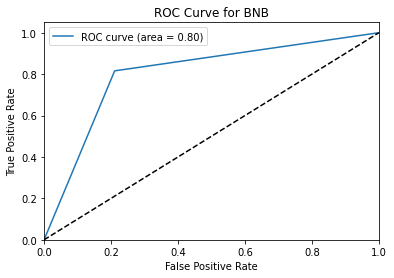

In [ ]:
acc={}
BNBmodel = BernoulliNB(alpha = 1.2)
BNBmodel.fit(X_train, y_train)
acc_BNB=model_predict(BNBmodel,'BNB')
acc['NaiveBayes']=acc_BNB
print(acc)

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      2002
           1       0.82      0.84      0.83      1998

    accuracy                           0.82      4000
   macro avg       0.82      0.82      0.82      4000
weighted avg       0.82      0.82      0.82      4000

0.824
0.824012824012824
{'NaiveBayes': 0.8025, 'LR': 0.824}


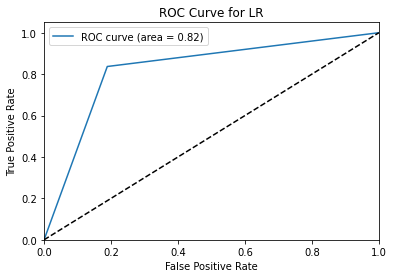

In [ ]:
LRmodel = LogisticRegression(C = 1.2 ,max_iter = 35, n_jobs=-1)
LRmodel.fit(X_train, y_train)
acc_LR=model_predict(LRmodel,'LR')
acc['LR']=acc_LR
print(acc)

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      2002
           1       0.80      0.82      0.81      1998

    accuracy                           0.81      4000
   macro avg       0.81      0.81      0.81      4000
weighted avg       0.81      0.81      0.81      4000

0.80875
0.8087640587640588
{'NaiveBayes': 0.8025, 'LR': 0.824, 'SVC': 0.80875}


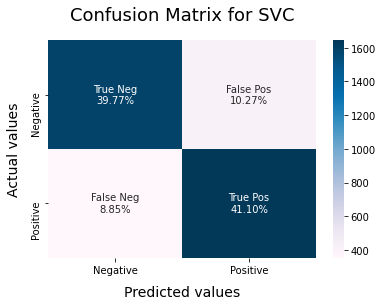

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
acc_SVC=model_predict(SVCmodel,'SVC')
acc['SVC']=acc_SVC
print(acc)

              precision    recall  f1-score   support

           0       0.77      0.69      0.73      2002
           1       0.72      0.79      0.75      1998

    accuracy                           0.74      4000
   macro avg       0.74      0.74      0.74      4000
weighted avg       0.74      0.74      0.74      4000

0.7415
0.7415512415512415
{'NaiveBayes': 0.8025, 'LR': 0.824, 'SVC': 0.80875, 'rf': 0.7415}


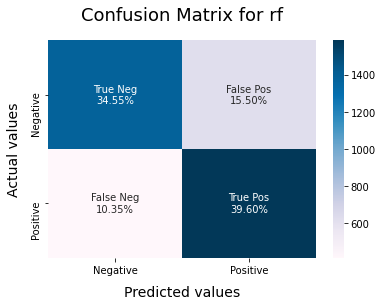

In [ ]:
RFmodel = RandomForestClassifier(n_estimators = 150, max_depth = 10)
RFmodel.fit(X_train, y_train)
acc_RF=model_predict(RFmodel,'rf')
acc['rf']=acc_RF
print(acc)

In [ ]:
print(acc)

{'NaiveBayes': 0.8025, 'LR': 0.824}


In [ ]:
path_accuracy={}
vectoriser_path='vectoriser.pickle'
file = open(vectoriser_path,'wb')
pickle.dump(vectoriser, file)
file.close()

LR_path='LR.pickle'
path_accuracy[LR_path]=acc_LR
file = open(LR_path,'wb')
pickle.dump(LRmodel, file)
file.close()

BNB_path='BNB.pickle'
path_accuracy[BNB_path]=acc_BNB
file = open(BNB_path,'wb')
pickle.dump(BNBmodel, file)
file.close()

SVC_path='SVC.pickle'
path_accuracy[SVC_path]=acc_SVC
file=open(SVC_path,'wb')
pickle.dump(SVCmodel,file)
file.close()

RF_path='RF.pickle'
path_accuracy[RF_path]=acc_RF
file=open(RF_path,'wb')
pickle.dump(RFmodel,file)
file.close()


In [ ]:
def load_vectorizer():
    file = open(f'/content/{vectoriser_path}', 'rb')
    vectoriser = pickle.load(file)
    file.close()
    return vectoriser

In [ ]:
#gives back the model
def load_given_model(model_path):
    
    file = open(model_path, 'rb')
    model = pickle.load(file)
    file.close()
    return  model




In [ ]:
def calculate_sentiment_count(tweet,all_models):
    positive_count=0
    negative_count=0
    for model in all_models:
        sentiment = all_models[model].predict(tweet)
        if sentiment:
            positive_count+=1
        else:
            negative_count+=1
    return positive_count,negative_count
        

In [ ]:
def calculate_total_weight():
    tot_weight=0.0
    for path in path_accuracy:
        print(path_accuracy[path])
        tot_weight+=path_accuracy[path]
    return tot_weight
total_models_weight=calculate_total_weight()
print(total_models_weight)

0.824
0.8025
0.80875
0.7415
3.17675


In [ ]:
def calculate_weight(path):
    total_weight=total_models_weight
    path_weight=path_accuracy[path]/total_weight
    return path_weight

In [ ]:
def calculate_sentiment_score(tweet,all_models,weight_of_models,positive_prob_count,negative_prob_count):
    positive_score=0
    negative_score=0
    for model in all_models:
        sentiment = all_models[model].predict(tweet)
        weight_model=weight_of_models[model]
        if sentiment:
            positive_score+=positive_prob_count * weight_model
        else:
            negative_score +=negative_prob_count * weight_model
    return positive_score,negative_score

In [ ]:
def ensemble(tweetwords):
    pred_text=[]
    count=0
    i=0
    all_models={}
    weight_of_models={}
    for path in path_accuracy:
        model=load_given_model(path)
        all_models[path]=model
        weight_of_models[path]=calculate_weight(path)
    for tweet in tweetwords:
        if (i%100==0):
            print(i)
        i+=1
        positive_count,negative_count=calculate_sentiment_count(tweet,all_models)
        positive_prob_count=positive_count/(positive_count+negative_count)
        negative_prob_count=negative_count/(positive_count+negative_count)
        positive_score,negative_score=calculate_sentiment_score(tweet,all_models,weight_of_models,positive_prob_count,negative_prob_count)
        if positive_score >= negative_score:
            sentiment_pred=1
        else:
            sentiment_pred=0
        if count<10:
            print(positive_count,negative_count)
            print(positive_prob_count,negative_prob_count)
            print(positive_score,negative_score)
            print(sentiment_pred)
            count+=1
        pred_text.append(sentiment_pred)
    print(classification_report(y_test, pred_text, output_dict=False))
    print(accuracy_score(y_test, pred_text))
    cf_matrix = confusion_matrix(y_test, pred_text)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels=[]
    for v1, v2 in zip(group_names,group_percentages):
        label_write=f'{v1}\n{v2}'
        labels.append(label_write)
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'PuBu',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix for ensemble classifier", fontdict = {'size':18}, pad = 20)

0
0 4
0.0 1.0
0 0.9999999999999999
0
0 4
0.0 1.0
0 0.9999999999999999
0
1 3
0.25 0.75
0.06484614779255528 0.5554615566223342
0
0 4
0.0 1.0
0 0.9999999999999999
0
2 2
0.5 0.5
0.24301566065947905 0.25698433934052095
0
0 4
0.0 1.0
0 0.9999999999999999
0
4 0
1.0 0.0
0.9999999999999999 0
1
4 0
1.0 0.0
0.9999999999999999 0
1
2 2
0.5 0.5
0.25698433934052095 0.24301566065947905
1
0 4
0.0 1.0
0 0.9999999999999999
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      2002
           1       0.81      0.83      0.82      1998

    accuracy                           0.82      4000
   macro avg       0.82      0.82      0.82      4000
weighted avg       0.82      0.82      0.82      4000

0.8215


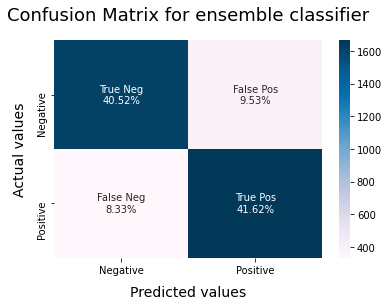

In [ ]:
ensemble(X_test)


In [ ]:
count=0
for test in X_test_1:
    if count<10:
        print(test)
        count+=1

want to compete want hard competition want to rally want to feel the power coming out of the engine want to compete 
it seems we are stuck on the ground in amarillo they have put ground stop for all flight leaving for denver said update in an hour 
where the are my pinking shear rarararrarararr babyproofing while cutting stuff make me stick shear random place amp forget them 
0ff t0 the meetin hate when ppl v0lunteer my free time grr 
reply me pls 
USER jazz in india is just honda strategy to prove they can make affordable car for the working class it still doesn't fit me 
aah met boy he seems nice im happy now 
USER URL sport center you guy are too legit to quit wooww 
USER not bad bit grumpy cause of exam but generally ok ta 
USER can't watch it what is it 
